# Market Basket Analysis of Store Data

## Dataset Description

* Different products given 7500 transactions over the course of a week at a French retail store.
* We have library(**apyori**) to calculate the association rule using Apriori.

## Import the Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

## Read data and Display

In [3]:
store_data = pd.read_csv("./store_data.csv", header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7501, 20)


In [4]:
def lower_all(store_data: pd.DataFrame):    
    for col in store_data.columns:
        store_data[col] = store_data.apply(lambda x: x[col].lower() if not pd.isna(x[col]) else x[col], axis=1)
    return store_data

In [5]:
store_data = lower_all(store_data)

In [6]:
def no_more_nans(store_data:pd.DataFrame) -> list:
    list_of_lists = store_data.values.tolist()
    new_l=[]
    for l in list_of_lists:
        cleaned_list = [value for value in l if not pd.isna(value)]
        new_l.append(cleaned_list)
    return new_l

In [7]:
new_l = no_more_nans(store_data)
new_l

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

## Preprocessing on Data
*  Here we need a data in form of list for Apriori Algorithm.

In [8]:
apriori_models = {}
params = [
    (2, "ass_2"),
    (3, "ass_3"),
    (4, "ass_4"),
    (5, "ass_5")
]


for i, name in params:
    apriori_model = apriori(new_l, min_support=0.0045, min_confidence=0.2, min_lift=3, max_length=i)
    apriori_models[name] = list(apriori_model)

In [9]:
ass_2_result = apriori_models["ass_2"]
ass_3_result = apriori_models["ass_3"]
ass_4_result = apriori_models["ass_4"]
ass_5_result = apriori_models["ass_5"]
ass_3_result = ass_3_result[len(ass_2_result):]
ass_4_result = ass_4_result[len(ass_3_result)+len(ass_2_result):]
ass_5_result = ass_5_result[len(ass_4_result)+len(ass_3_result)+len(ass_2_result):]

## How many relation derived

In [10]:
print("There are {} Relation derived.".format(len(ass_4_result)+len(ass_3_result)+len(ass_2_result)+len(ass_5_result)))

There are 24 Relation derived.


In [11]:
#gets order statistic(that was nested in main list) and the support value
def get_order_static(ass_result) -> list:
    ass_ordered = []
    for record in ass_result:
        support = record[1]
        for i in range(len(record.ordered_statistics)):
            ass_ordered.append((record.ordered_statistics[i], support))
    return ass_ordered

In [12]:
ass_2_oredered = get_order_static(ass_2_result)
ass_3_oredered = get_order_static(ass_3_result)
ass_4_oredered = get_order_static(ass_4_result)

### Association Rules Derived

## Rules Generated

In [13]:
def conv_to_df(ass: list) -> pd.DataFrame :
    pairs , supports , confs , lifts=[],[],[],[]
    for item  in ass:
        pair = item[0][0]
        items = [x for x in pair]
        target = [x for x in item[0][1]]
        pairs.append(" , ".join(items[:]) + " -> "+str(target[0]))
        confs.append(item[0][2])
        lifts.append(item[0][3])
        supports.append(item[1])
    pass
    d={}
    d["items"] = pairs
    d["support"] = supports
    d["confidence"] = confs
    d["lift"] = lifts
    df2 = pd.DataFrame(d , columns=["items","support" ,"confidence" ,"lift"] , index=np.arange(len(pairs)))
    return df2

In [14]:
df2 = conv_to_df(ass_2_oredered)
df3 = conv_to_df(ass_3_oredered)
df4 = conv_to_df(ass_4_oredered)

In [15]:
def sort_by(data):
    data = data.sort_values(["lift" , "support"] , ascending=False).reset_index(drop=True)
    return data

In [16]:
df3 = sort_by(df3)
df3

,items,support,confidence,lift
0,"spaghetti , herb & pepper -> ground beef",0.006399,0.393443,4.004360
1,"mineral water , herb & pepper -> ground beef",0.006666,0.390625,3.975683
2,"spaghetti , frozen vegetables -> tomatoes",0.006666,0.239234,3.498046
3,"mineral water , soup -> olive oil",0.005199,0.225434,3.423030
4,"ground beef , milk -> olive oil",0.004933,0.224242,3.404944
5,"spaghetti , tomatoes -> frozen vegetables",0.006666,0.318471,3.341054
6,"spaghetti , grated cheese -> ground beef",0.005333,0.322581,3.283144
7,"ground beef , cooking oil -> spaghetti",0.004799,0.571429,3.281995
8,"frozen vegetables , olive oil -> milk",0.004799,0.423529,3.268410
9,"frozen vegetables , chocolate -> shrimp",0.005333,0.232558,3.254512


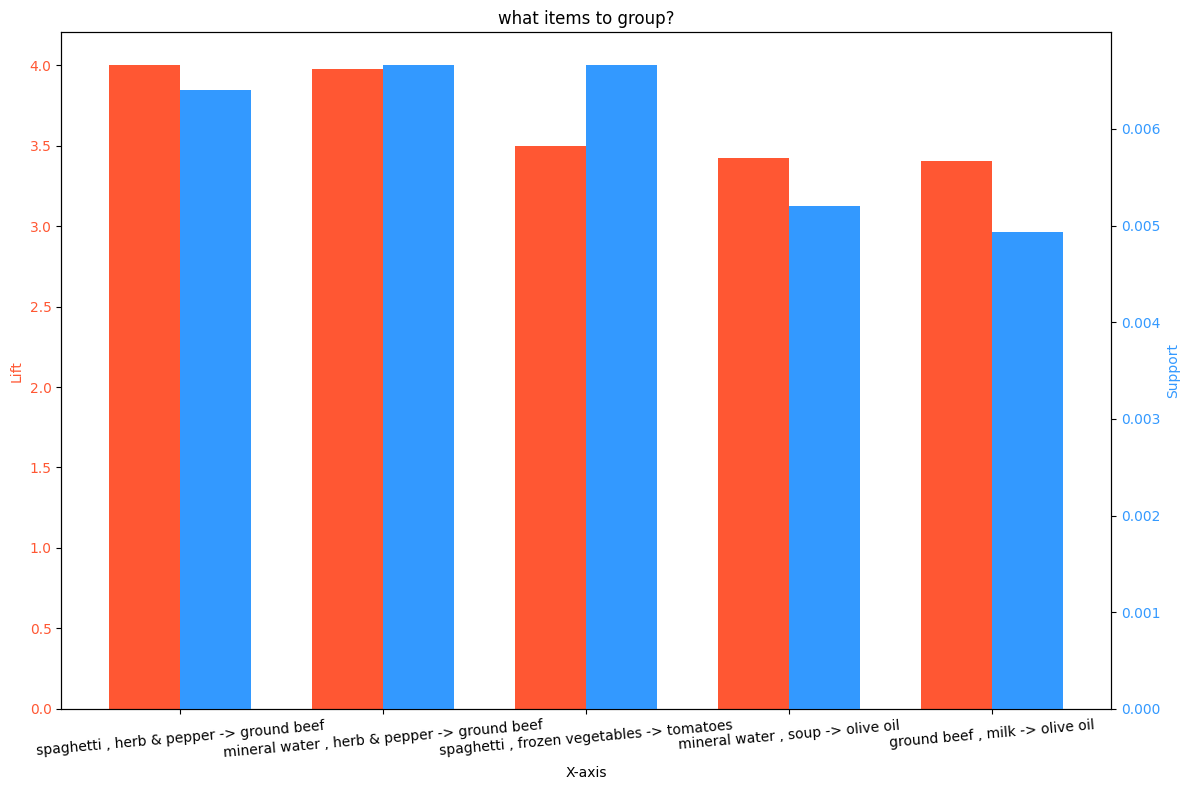

In [51]:
df = df3.copy()
colors = ['#FF5733', '#3399FF']
# Create a figure and axis
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Extract data for plotting
items = df['items'][:5]
lift = df['lift'][:5]
support = df['support'][:5]

# Set the width of the bars
bar_width = 0.35

# Generate an array of x positions for each group
x = np.arange(len(items))

# Create side-by-side bars for Lift and Support
plt.bar(x, lift, bar_width, color=colors[0], label='Lift')
ax.set_xlabel('X-axis')
ax.set_ylabel('Lift', color=colors[0])
ax.tick_params(axis='y', labelcolor=colors[0])


# # Set the x-axis labels and rotate them by 90 degrees
# plt.xticks(x + bar_width/2, items, rotation=90, ha="right")

# # Set the y-axis label for Lift
# plt.ylabel("Lift")

# Create a secondary y-axis for Support
ax2 = ax.twinx()
plt.bar(x + bar_width, support, bar_width, color=colors[1], label='Support')
ax2.set_ylabel('Support', color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

# Add a legend

# Set the title
plt.title("what items to group?")

# Show the plot
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(items, rotation=5)

plt.tight_layout()
plt.show()
